# Mathematical Underpinnings - Lab 10

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import scale

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import Lasso

## Task 1

In [4]:
df = pd.read_csv('prostate.data', sep="\t", index_col=0)

In [5]:
X = np.array(df.iloc[:, 0:8])
Y = np.array(df.iloc[:, 8])

In [6]:
X = scale(X)
Y = scale(Y)

In [7]:
X.shape, Y.shape

((97, 8), (97,))

In [8]:
X[0,:]

array([-1.64586143, -2.01663373, -1.87210098, -1.03002898, -0.52565748,
       -0.86765522, -1.04757113, -0.86895727])

### a)

In [9]:
mod_lars = Lars(fit_intercept=False)

In [10]:
mod_lars.fit(X, Y)

Lars(fit_intercept=False)

In [11]:
mod_lars.alphas_

array([0.73446033, 0.36963266, 0.3157    , 0.12438766, 0.10869606,
       0.05558212, 0.03210302, 0.01913394, 0.        ])

In [12]:
mod_lars.coef_path_

array([[ 0.        ,  0.36482767,  0.39987516,  0.48292339,  0.48727526,
         0.50491055,  0.51741672,  0.5223149 ,  0.57621928],
       [ 0.        ,  0.        ,  0.        ,  0.14883554,  0.16119869,
         0.18200727,  0.20157703,  0.21336467,  0.23085294],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.05185925, -0.08120861, -0.13704517],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.04431172,  0.07629111,  0.09366845,  0.12155214],
       [ 0.        ,  0.        ,  0.03504749,  0.15848291,  0.16571251,
         0.19858501,  0.2110316 ,  0.21890832,  0.2731707 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.1284605 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.0106656 ,  0.03079639],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0

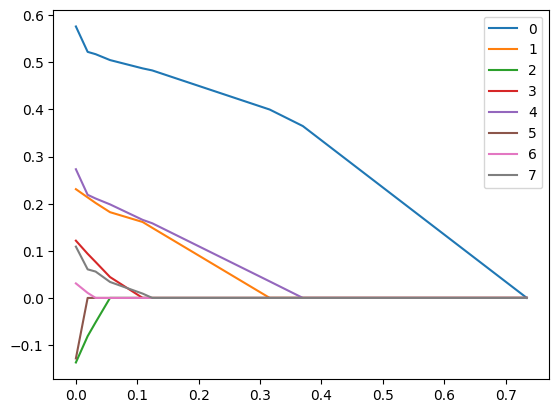

In [13]:
plt.plot(mod_lars.alphas_, mod_lars.coef_path_.T)
plt.legend(range(10))
plt.show()

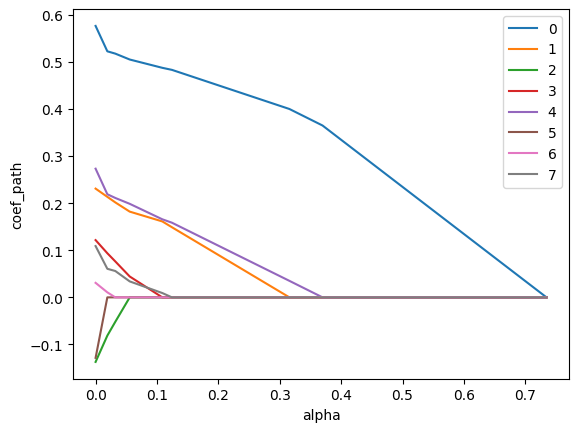

In [ ]:
fig = plt.figure()
ax = fig.gca()
for i in range(mod_lars.coef_path_.shape[0]):
  ax.plot(mod_lars.alphas_, mod_lars.coef_path_[i])
plt.legend([str(i) for i in range(mod_lars.coef_path_.shape[0])])
plt.xlabel("alpha")
plt.ylabel("coef_path")
plt.show()

Order in which the variables are included in the model:

In [17]:
np.argsort((mod_lars.coef_path_ == 0).sum(axis=-1))

array([0, 4, 1, 7, 3, 2, 6, 5])

### b)

In [18]:
mod_lars.alphas_[0]

0.7344603262136732

### b1)

In [19]:
selected_variables = []

In [24]:
selected_variables.append(np.argmax(np.corrcoef(X.T,Y)[-1,:8]))
selected_variables

[0]

### b2)

In [25]:
mod1 = LinearRegression(fit_intercept=False)
mod1.fit(X[:, selected_variables], Y)
mod1.coef_[0], mod1.intercept_

(0.7344603262136729, 0.0)

### b3)

In [26]:
corr_tilde_alpha_seq = np.zeros((100,8))
tilde_alpha_seq = np.linspace(0,1,100)
for i in range(100):
  res1 = Y - tilde_alpha_seq[i] * np.dot(X[:,selected_variables], mod1.coef_)
  corr_tilde_alpha_seq[i,:] = np.corrcoef(X.T, res1.T)[-1,:8]

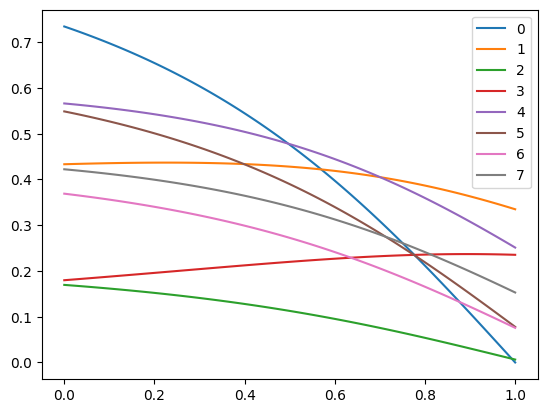

In [27]:
plt.plot(tilde_alpha_seq, corr_tilde_alpha_seq)
plt.legend(range(8))
plt.show()

Answer: Blue line (variable 0) visualizes the theorem

### b4)

In [33]:
tilde_alpha_2 = 0.5
res1 = Y - tilde_alpha_2 * np.dot(X[:,selected_variables], mod1.coef_)
corrs = np.corrcoef(X.T, res1)[-1,:8]

In [34]:
corrs[0], corrs[4]

(0.4759095723474519, 0.4773453757968736)

In [35]:
np.abs(corrs[4] - corrs[0])

0.0014358034494216798

Next variable is 4. $$ Cor(r_{1,\hat \alpha_{2}},X_{S_{1}}) \approx Cor(r_{1,\hat \alpha_{2}},X_{S_{2}})$$

### b5)

$$ \textrm{Cor}(Y - \tilde\alpha\hat Y, X_i) = ... \cdot\textrm{Cor}(Y, X_i) - ... \cdot \tilde\alpha \cdot \textrm{Cor}(\tilde\alpha\hat Y, X_i) $$

$$ \tilde\alpha = \frac{\sqrt{(Var(Y)} \cdot Cor(Y,X_i)-\sqrt{(Var(Y)} \cdot Cor(Y,X_j)}{\sqrt{(Var(\hat Y)} \cdot Cor(\hat Y,X_i) - \sqrt{(Var(\hat Y)} \cdot Cor(\hat Y,X_j)}$$

In our case, $i=0$, $j=4$:
$$ |\textrm{Cor}(Y - \tilde\alpha\hat Y, X_i)| = |\textrm{Cor}(Y - \tilde\alpha\hat Y, X_j)|$$

In [36]:
i, j = 0, 4

In [39]:
Y_hat = mod1.predict(X[:, i, np.newaxis])

In [41]:
var_y = np.var(Y)
corr_xy1 = np.corrcoef(Y, X[:, i])[0, 1]
corr_xy2 = np.corrcoef(Y, X[:, j])[0, 1]

In [43]:
var_yhat = np.var(Y_hat)
corr_xyhat1 = np.corrcoef(Y_hat, X[:, i])[0,1]
corr_xyhat2 = np.corrcoef(Y_hat, X[:, j])[0,1]

In [44]:
tilde_alpha_2 = (np.sqrt(var_y) * corr_xy1 - np.sqrt(var_y) * corr_xy2) / \
                (np.sqrt(var_yhat) * corr_xyhat1 - np.sqrt(var_yhat) * corr_xyhat2)

In [45]:
tilde_alpha_2

0.4967289013871954

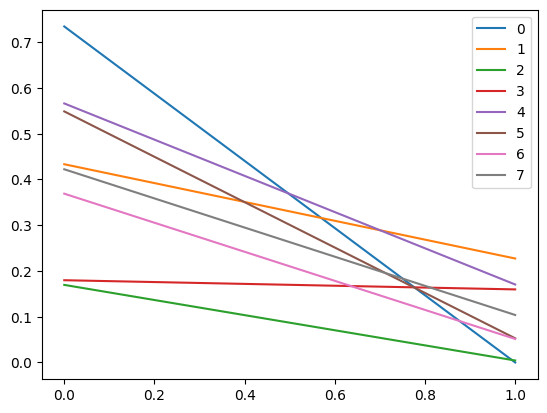

In [46]:
tilde_alpha_seq = np.linspace(0,1,100)
for v in range(8):
  corr_xy = np.corrcoef(X[:,v], Y)[0,1]
  corr_xyhat = np.corrcoef(X[:,v],Y_hat)[0,1]
  plt.plot(
      tilde_alpha_seq,
      np.sqrt(var_y) * corr_xy - tilde_alpha_seq * np.sqrt(var_yhat) * corr_xyhat
  )
plt.legend(range(8))
plt.show()

### b6)

In [49]:
mod_lars.alphas_

array([0.73446033, 0.36963266, 0.3157    , 0.12438766, 0.10869606,
       0.05558212, 0.03210302, 0.01913394, 0.        ])

In [48]:
alpha_2 = (np.sqrt(var_y) * np.corrcoef(X[:, j], Y) - tilde_alpha_2 * np.sqrt(var_yhat) * np.corrcoef(X[:, j], Y_hat))[0, 1]
alpha_2

0.36963265526107464

In [50]:
mod_lars.alphas_[1]

0.3696326552610746

In [51]:
res2 = Y - tilde_alpha_2 * Y_hat

In [52]:
selected_variables.append(j)
selected_variables

[0, 4]

### b7)

In [55]:
mod2 = LinearRegression(fit_intercept=False)
mod2.fit(X[:, selected_variables], res2)
mod2.coef_

array([0.24020136, 0.24020136])

### b8)

In [57]:
tilde_alpha_seq = np.linspace(0,1,100)
Y_hat = mod2.predict(X[:, selected_variables])

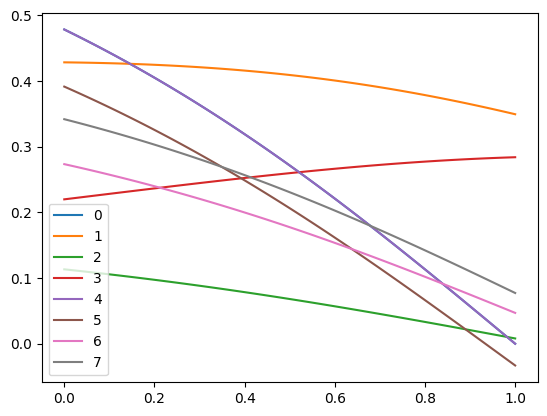

In [59]:
for i in range(100):
  res = res2 - tilde_alpha_seq[i] * Y_hat
  corr_tilde_alpha_seq[i,:] = np.corrcoef(X.T, res)[:-1,-1]
plt.plot(tilde_alpha_seq, corr_tilde_alpha_seq)
plt.legend(range(8))
plt.show()

Blue (0) and purple (4) lines visualize the theorem

### b9)

Next variable to be chosen is 1 (orange line). Approximate value of alpha tilde: 0.15

In [75]:
tilde_alpha_2 = 0.15
res3 = res2 - tilde_alpha_2 * Y_hat
corrs = np.corrcoef(X.T, res3)[-1,:8]

In [76]:
corrs

array([0.42445407, 0.42591833, 0.10153875, 0.23228216, 0.42445407,
       0.34295025, 0.24871722, 0.31341359])

In [77]:
k = 1

### b10)

In [72]:
var_y = np.var(res2)
corr_xy1 = np.corrcoef(res2, X[:, j])[0, 1]
corr_xy2 = np.corrcoef(res2, X[:, k])[0, 1]

In [73]:
var_yhat = np.var(Y_hat)
corr_xyhat1 = np.corrcoef(Y_hat, X[:, j])[0,1]
corr_xyhat2 = np.corrcoef(Y_hat, X[:, k])[0,1]

In [74]:
tilde_alpha_3 = (np.sqrt(var_y) * corr_xy1 - np.sqrt(var_y) * corr_xy2) / \
                (np.sqrt(var_yhat) * corr_xyhat1 - np.sqrt(var_yhat) * corr_xyhat2)
tilde_alpha_3

0.14590879649354802

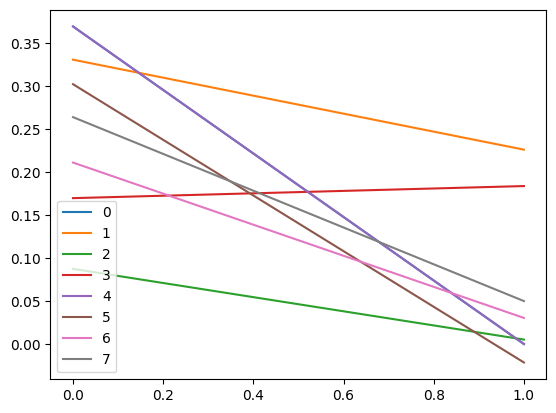

In [83]:
tilde_alpha_seq = np.linspace(0,1,100)
for v in range(8):
  corr_xy = np.corrcoef(X[:,v], res2)[0,1]
  corr_xyhat = np.corrcoef(X[:,v],Y_hat)[0,1]
  plt.plot(
      tilde_alpha_seq,
      np.sqrt(var_y) * corr_xy - tilde_alpha_seq * np.sqrt(var_yhat) * corr_xyhat
  )
plt.legend(range(8))
plt.show()

### b11)

In [79]:
alpha_3 = (np.sqrt(var_y) * np.corrcoef(res2, X[:, k]) - tilde_alpha_3 * np.sqrt(var_yhat) * np.corrcoef(Y_hat, X[:, k]))[0,1]
alpha_3

0.31569999938721677

In [80]:
mod_lars.alphas_[2]

0.31569999938721693

In [81]:
res3 = res2 - tilde_alpha_3 * Y_hat

In [84]:
selected_variables.append(k)
selected_variables

[0, 4, 1]

### c)

## Task 2

In [ ]:
X = pd.read_table("data/SRBCT_X.txt", sep=" ")
Y = pd.read_table("data/SRBCT_Y.txt", sep=" ")

X = np.array(X)
Y = np.array(Y)[:,0]

In [ ]:
X = scale(X)
Y = Y - np.mean(Y)

### a)

In [ ]:
mod_lars = Lars(n_nonzero_coefs=80)
# fit

In [ ]:
# plot

In [ ]:
# the order

### b)

In [ ]:
mod_lassolars = LassoLars(alpha=0.15)
# fit

In [ ]:
# order

In [ ]:
# plot

### c)

In [ ]:
lasso_coef = np.zeros((X.shape[1], mod_lassolars.alphas_.shape[0]))

In [ ]:
for i in range(mod_lassolars.alphas_.shape[0]):
    mod_lasso = Lasso(alpha=mod_lassolars.alphas_[i])
    mod_lasso.fit(X, Y)

    lasso_coef[:,i] = mod_lasso.coef_

In [ ]:
# plot